# Exploring non linear data ⏺

---

<img width=600px src="https://c.pxhere.com/photos/ae/84/building_facade_architecture_hole_basel_opening_places_of_interest_event_hall-888209.jpg!d">

---

In this exercice, we will deal with data that is not **linearly separable** (which means that we can separate classes with a line). We will see it's make it more difficult for models to fit it and explore a few options to tackle that.

First, we load the data for you using `make_circles` built-in function from scikit-learn.

In [1]:
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.08, factor=0.2, random_state=42)
X.shape, y.shape

((100, 2), (100,))

We also visualize quickly our data on the 2D dimension created by the 2 features of X. We will call these features `x1` and `x2`.

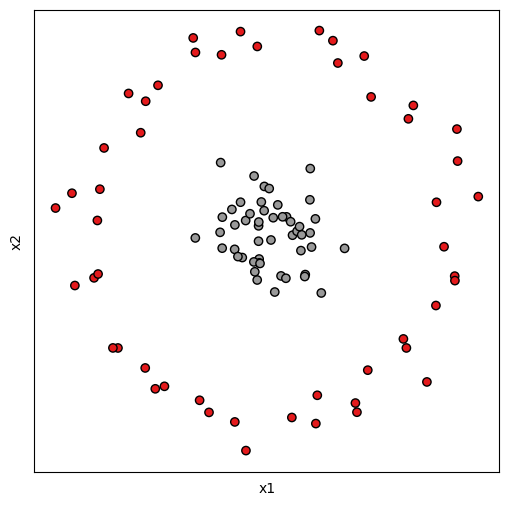

In [2]:
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(6, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Format chart
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()

### I. Logistic Regression

**Q1**. Fit a Logistic Regression to the data.

In [3]:
# TODO: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X, y)

y_pred = lr.predict(X)

**Q2**. What is the accuracy of your model? The error? Comment.

In [4]:
# TODO: Logistic Regression accuracy
accuracy_score(y_pred, y)
# 0.5

0.5

**Q3**. We want to visualize the decision boundaries of our model to better understand the previous performance. We will predict each pixel and assign it a color. 

We create for you the grid of points.

- Store in the new variable `y_grid` the value of the predictions of your model.
- What is the shape of `y_grid`? In order to use this label as the color we need to reshape it to the shape of the grid (`xx1.shape`)
- Run last block of code, it should successfully plot the data points and paint the decision boundaries

In [5]:
import numpy as np

# We create a grid of points contained within
# [x1_min - 0.5, x1_max + 0.5] x [y1_min - 0.5, y1_max + 0.5] with step h=0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]

In [6]:
# TODO: Retrieve predictions for all data points of the grid in a new variable y_grid
y_grid = lr.predict(X_grid)
y_grid.shape
#(26080,)


(26080,)

In [7]:
# TODO: Reshape y_grid to the shape of the grid
xx1.shape
#(160, 163)
y_grid = y_grid.reshape((xx1.shape[0], xx1.shape[1]))
y_grid.shape
#(160, 163)


(160, 163)

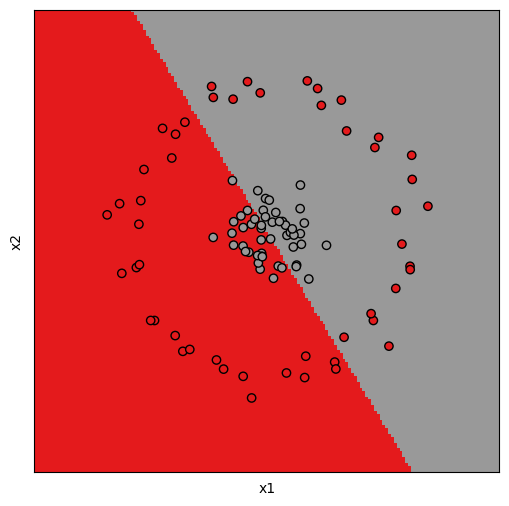

In [8]:
# Create figure to draw chart
plt.figure(2, figsize=(6, 6))

try:
    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx1, xx2, y_grid, cmap=plt.cm.Set1)
except:
    print("Something went wrong 😣 Are you sure you retrieved predictions \
on your grid points and reshaped it to the proper size?")
    pass

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)

# Format chart
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()

**Q4**. Comment the decision boundaries. Is the Logistic Regression fitting properly the data?

In [9]:
# TODO: Conclusion
#LR is not suitable here in the case of circular disribution of the data

### II. Kernel

Now, what if we create a new variable $z = {x_1^2 + x_2^2}$ and that we plot the points X in the dimension (x1, z)? Let's see what happens...

**Q5**. Create a new variable `X_new` corresponding to X with an additional column $z = {x_1^2 + x_2^2}$

> 🔦 **Hint**: You could for example use the function `column_stack` from NumPy to concatenate column `x1` and newly created column `z`

In [10]:
# TODO: X_new: remplace X[:, 1]
x1_tmp = X[:, 0]
x2_tmp = X[:, 1]

X_new = x1_tmp * x1_tmp + x2_tmp * x2_tmp
X_new.shape
#X.shape


(100,)

**Q6**. Plot the data points in the dimesions (x1, z).

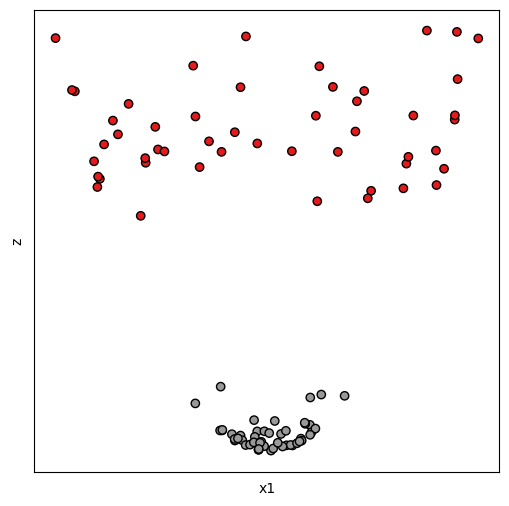

In [11]:
# TODO: X_new plot
# Create figure to draw chart
plt.figure(2, figsize=(6, 6))

# Plot the training points
plt.scatter(X[:, 0], X_new[:], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Format chart
plt.xlabel('x1')
plt.ylabel('z')
plt.xticks(())
plt.yticks(())
plt.show()

**Q7**. Is the data linearly separable? Fit a logistic regression, compute accuracy and compare with previous results.

In [12]:
# TODO: Logistic Regression X_new

### III. Support Vector Machines (SVMs)

The transformation we just applied ($z = {x_1^2 + x_2^2}$) is called a **kernel**. Thankfully, you don’t have to guess the transformation every time.

The Support Vector Machines (SVMs), that have been discovered not so lately in the 60s, are another group of **supervised learning models**.

> In addition to performing linear classification, **SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces**.

You will see that implementing this kernel trick, is simply a parameter we set when calling the sklearn SVM method.

> 📚 **Resources**: If you are interested in learning more about SVMs : https://en.wikipedia.org/wiki/Support-vector_machine

**Q8.** First, we will implement a **linear Support Vector Classifier**. Find the corresponding method in scikit-learn documentation and fit your model to your data. How does your model perform?

> ⚠️ **Warning**: Fit your model to X (with 2 original columns x1 and x2), not to X_new

In [13]:
# TODO: Linear SVC
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X, y)
y_pred = svc.predict(X)
acc = accuracy_score(y, y_pred)

**Q9.** Visualize decision boundaries for this new model.

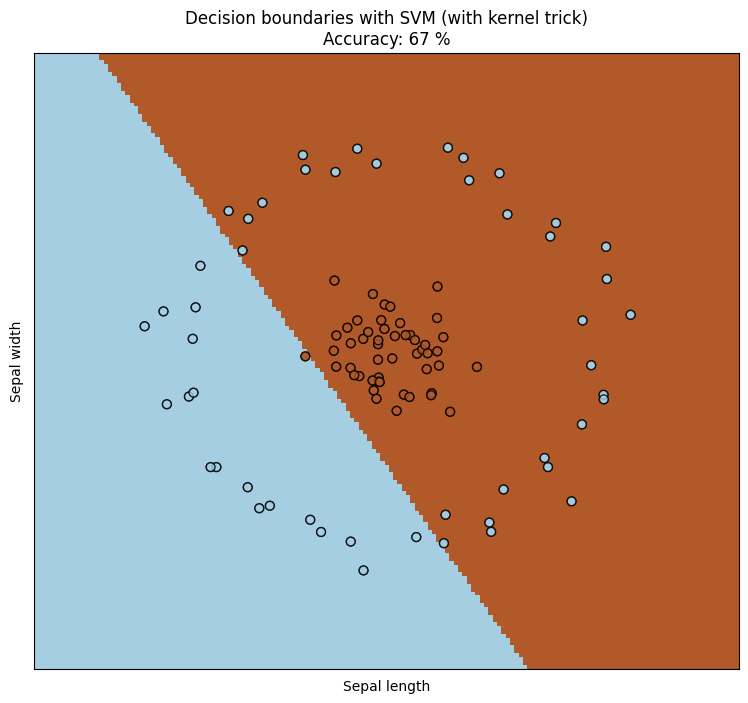

In [14]:
# TODO: Linear SVC visualization
# Create figure to draw chart
def plot_SVC(X, y, acc):
    plt.figure(figsize=(20, 8))

    # We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size of the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Retrieve predictions for each point of the grid
    Z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_svc = Z_svc.reshape(xx.shape)

    plt.subplot(1, 2, 1)
    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx, yy, Z_svc, cmap=plt.cm.Paired)

    # And plot the testing point in white
    plt.scatter(X[:, 0], X[:, 1], c=y,
                edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)

    # Format chart
    plt.title(f"Decision boundaries with SVM (no kernel trick)\nAccuracy: {round(acc*100)} %")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())

    # And plot the testing point in white
    plt.scatter(X[:, 0], X[:, 1], c=y,
                edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)

    # Format chart
    plt.title(f"Decision boundaries with SVM (with kernel trick)\nAccuracy: {round(acc*100)} %")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())

    plt.show()

plot_SVC(X, y, acc)

**Q10.** Now, fit a new SVC to your data but with kernel `rbf`. Evaluate performance and visualize boundaries. Compare with previous results.

> 🔦 **Hint**: More info on SVM kernels: https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [15]:
# TODO: SVC with `rbf` kernel
from sklearn.svm import SVC

svc_k = SVC(kernel='rbf')
svc_k.fit(X, y)
y_pred = svc_k.predict(X)
acc_k = accuracy_score(y, y_pred)

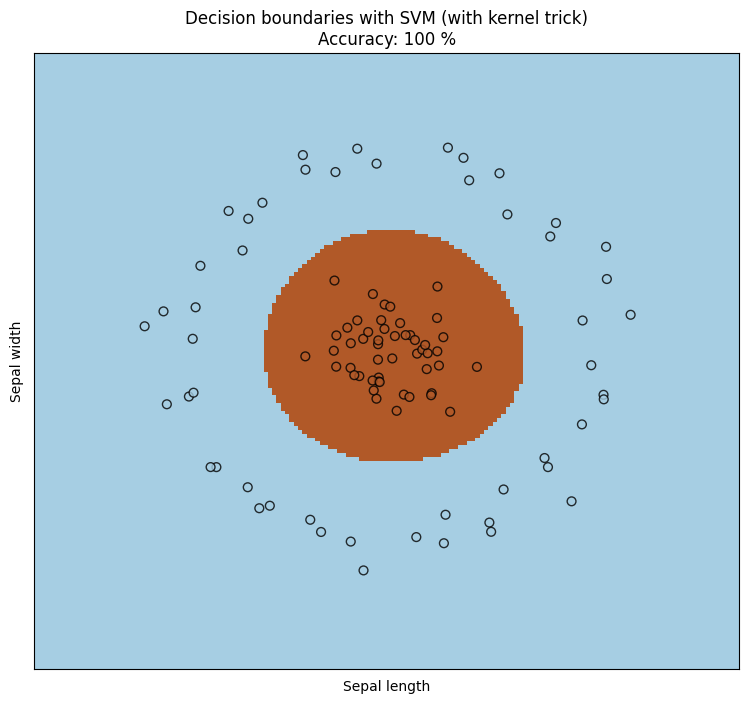

In [16]:
# TODO: rbf SVC visualization
# !!!! duplication de code !!! il faudrait faire une fcn de plot
# Create figure to draw chart
plt.figure(figsize=(20, 8))

# We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_svc_k = svc_k.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svc_k = Z_svc_k.reshape(xx.shape)

plt.subplot(1, 2, 2)
# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_svc_k, cmap=plt.cm.Paired)

# And plot the testing point in white
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)

# Format chart
plt.title(f"Decision boundaries with SVM (with kernel trick)\nAccuracy: {round(acc_k*100)} %")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.show()